# <center>Figures

This notebook shows how to reproduce some of the figures from the 2T-qutrit paper. Only a small number of points are computed so that the notebook can be run in a reasonable amount of time (about 10 minutes). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import figures as fig
import code_mpsk as mpsk
import code_24cell as c24
import optimisation as opti
import dephasing as d_2T
import dephasing_cats as d_cats

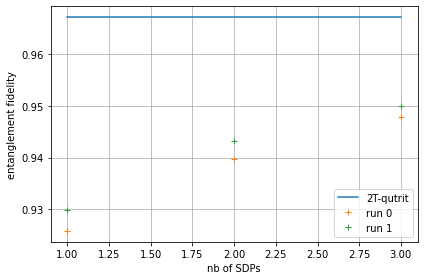

In [2]:
# figure 1


gamma = 0.1
alpha = 1.5
nb_sdps = 3
nb_runs = 2


# 2T-qutrit 
constellation = c24.TwentyFourCellConstellation(gamma, alpha)
list_nb_sdps, list_fidelities, list_nbars = \
    opti.generalised_iterative_optimisation_of_decoding_and_encoding(
        constellation=constellation, # constellation with the 24 two-mode coherent states
        logical_states=c24.the_2t_qutrit(constellation), # the encoding is the 2T-qutrit
        dim_enc=3, # dimension of encoding is 3 for a qutrit
        nb_sdps=nb_sdps) 


# strating from random encodings
list_list_nb_sdps, list_list_fidelities, list_list_nbars = \
    fig.plots_random_runs(constellation=c24.TwentyFourCellConstellation(gamma, alpha),
                      nb_sdps=nb_sdps, # several SDPs are solved to optimise both the decoding and the encoding
                      nb_runs=nb_runs, # number of encodings to start from
                      dim_enc=3)

# plots
plt.figure(1)
plt.plot(list_nb_sdps,list_fidelities,'-',label='2T-qutrit')

for i_run in range(nb_runs):
    plt.plot(list_list_nb_sdps[i_run],np.array(list_list_fidelities[i_run]),
         label='run '+str(i_run),marker='+',linestyle='None')
plt.legend(loc='lower right')
plt.grid()
plt.yscale('linear')
plt.xlabel('nb of SDPs')
plt.ylabel('entanglement fidelity')
plt.tight_layout()

In [3]:
# figure 2 : Qutrits, loss

gamma = 1e-1
modulation_amplitudes = np.linspace(0.5,3,3)

# 2T-qutrit
list_found_mod_ampl2T,list_found_fidelities2T,list_found_nbars2T = \
    fig.generalised_plot_fct_alpha(modulation_amplitudes=modulation_amplitudes,
                                          func_kets=c24.the_2t_qutrit,
                                          params={},
                                          gamma=gamma,
                                          label='2T-qutrit',
                                          linestyle='-')

# 3-psk qutrit
list_found_mod_ampl3psk,list_found_fidelities3psk,list_found_nbars3psk =\
    fig.final_fidelity_as_a_function_of_alpha(modulation_amplitudes=modulation_amplitudes,
                                      states=[np.array([[1],[0],[0]]),
                                              np.array([[0],[1],[0]]),
                                              np.array([[0],[0],[1]])],
                                      dim_enc=3,
                                      nb_sdps=1,
                                      TypeConstellation=mpsk.MpskConstellation,
                                      args_cons={'gamma':gamma,'nb_coh':3})

plt.plot(list_found_mod_ampl2T,
         np.array(list_found_fidelities2T),
         label='2T-qutrit',marker='+',linestyle='-')

plt.plot(list_found_mod_ampl3psk,
         np.array(list_found_fidelities3psk),
         label='qutrit in 3-psk',marker='+',linestyle='-')

plt.xlabel(r'$\alpha$')
plt.ylabel('entanglement fidelity')
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True, which="both")
plt.tight_layout()
plt.legend()

/home/ROCQ/cosmiq/adenys/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Figure 3 can be reproduced using the function plot_opt_infid_nbar_function_of_gamma from the file figures.py but it takes a long time to run, even for a small number of points.

/home/ROCQ/cosmiq/adenys/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Text(0, 0.5, 'entanglement fidelity')

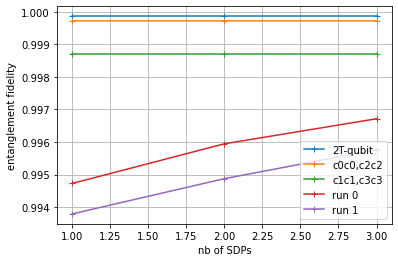

In [4]:
# figure 4 : Qubits, loss

gamma = 0.01
alpha = 1.5
nb_sdps = 3
nb_runs = 2

constellation = c24.TwentyFourCellConstellation(gamma, alpha)
c0c0 = c24.construct_cjck(0, 0, constellation)
c2c2 = c24.construct_cjck(2,2, constellation)
c1c1 = c24.construct_cjck(1,1, constellation)
c3c3 = c24.construct_cjck(3,3, constellation)
phi1, phi2 = c24.fct_2T_qubit(constellation)

# 2T-qubit
list_nb_sdps2T, list_fidelities2T, list_nbars2T = \
     fig.plot_infid_nbar_fct_of_i_sdp(constellation,
                                   [phi1,phi2],
                                   2,
                                   nb_sdps=nb_sdps)
plt.plot(list_nb_sdps2T,list_fidelities2T,label='2T-qubit',marker='+',linestyle='-')

# c0c0, c2c2
list_nb_sdps0022, list_fidelities0022, list_nbars0022 = \
    fig.plot_infid_nbar_fct_of_i_sdp(constellation,
                                  [c0c0,c2c2],
                                  2,
                                  nb_sdps=nb_sdps)
plt.plot(list_nb_sdps0022,list_fidelities0022,label='c0c0,c2c2',marker='+',linestyle='-')

#c1c1, c3c3
list_nb_sdps1133, list_fidelities1133, list_nbars1133 = \
    fig.plot_infid_nbar_fct_of_i_sdp(constellation,
                                  [c1c1,c3c3],
                                  2,
                                  nb_sdps=nb_sdps)
plt.plot(list_nb_sdps1133,list_fidelities1133,label='c1c1,c3c3',marker='+',linestyle='-')

# starting from random encodings
list_list_nb_sdps_rand, list_list_fidelities_rand, list_list_nbars_rand =\
     fig.plots_random_runs(constellation=c24.TwentyFourCellConstellation(gamma, alpha),
                       nb_sdps=nb_sdps,
                       nb_runs=nb_runs,
                       dim_enc=2)
for i_run in range(nb_runs):
    plt.plot(list_list_nb_sdps_rand[i_run],np.array(list_list_fidelities_rand[i_run]),
          label='run '+str(i_run),marker='+')

plt.legend(loc='lower right')
plt.grid()
plt.yscale('linear')
plt.xlabel('nb of SDPs')
plt.ylabel('entanglement fidelity')

/home/ROCQ/cosmiq/adenys/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


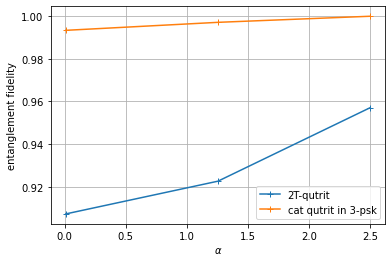

In [5]:
alphas = np.linspace(0.01, 2.5,3)
gamma_deph = 0.01

# figure 5 : qutrits, dephasing
plt.figure(1)

# 2T
alphas_2T, fidelities_2T = d_2T.fid_fct_alpha(alphas,gamma_deph,truncation=6)
plt.plot(alphas_2T,fidelities_2T,'-',marker='+',label='2T-qutrit')

#3-psk
alphas_3psk, fidelities_3psk = d_cats.fid_fct_alpha(alphas,gamma_deph,truncation=20,nb_legs=3)
plt.plot(alphas_3psk,fidelities_3psk,'-',marker='+',label='cat qutrit in 3-psk')

plt.xlabel(r'$\alpha$')
plt.ylabel('entanglement fidelity')
plt.legend(loc='lower right')
plt.grid()